In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [2]:
warnings.filterwarnings ('ignore')

# 1. Single Layer Perceptron

In [3]:
x = np.array ([10, 29, 2])

# Set weights, one for each feature
w = np.random.normal (size=3)

# Set bias
b = 0

# Compute weights sum + bias
y = np.dot (x, w) + b
print (y)

-11.96836509111478


In [4]:
z = np.sign (y)
z

np.float64(-1.0)

In [5]:
def sigmoid (z):
    return 1/(1+np.exp (-z))

z = int (sigmoid (y) < 0.5)
z

1

In [6]:
x = np.array ([
    [10, 29, 2],
    [23, 3, 9],
    [11, 4, 3],
    [6, 15, 2],
    [15, 3, 3]
])
w = np.random.normal (size=3)
b = -25
y = np.dot (x, w) - b
y

array([-3.56234686,  1.49446094, 10.34398217, 10.41725405,  4.72197041])

In [7]:
z = (sigmoid (y) < 0.5).astype (int)
z

array([1, 0, 0, 0, 0])

# 2. Multilayer Perceptron

* Each of the 5 node in 1st hidden layer has 3 inputs so it will have a 3 x 5 array for weights;

* The output layer has one node and 5 inputs so will have a 5 x 1 array of weights.

In [8]:
x = np.array ([10, 29, 2])
w1 = np.random.normal (size=(3, 5)) # weights for hidden layer 
w2 = np.random.normal (size=(5, 1)) # weights for output layer
b1 = np.random.normal (size=(1,5))
b2 = np.random.normal (size=(1,1))

# MLP Classifier
# First layer
y1 = x @ w1 + b1
print (y1)

# Second layer
y2 = y1 @ w2 + b2
print (y2)

# Output thresholding
z = (sigmoid (y2) < 0.5).astype (int)
z

[[ -6.17060201  17.55227271   8.88072559   5.53968949 -28.54602104]]
[[18.87316681]]


array([[0]])

# 3. Activation Function

In [9]:
# Rectified Linear Unit (ReLU)
def relu (x):
    """
    Computes ReLu function
    """
    return np.maximum (0, x)

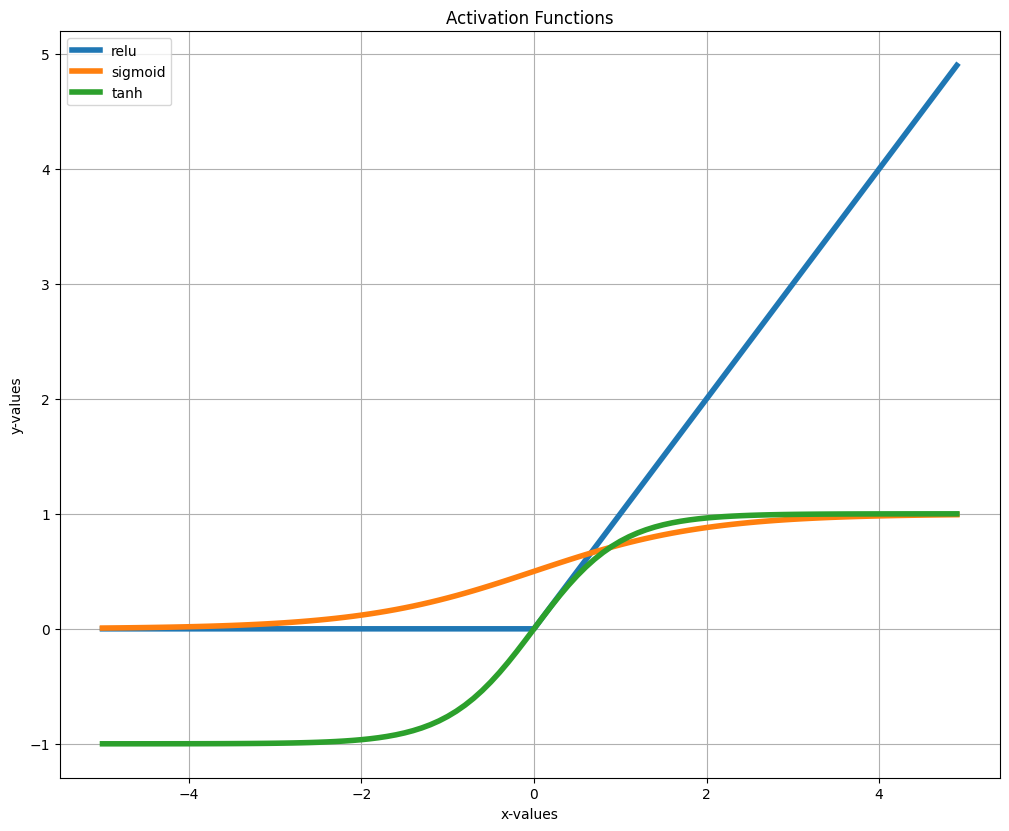

In [13]:
x = np.arange (-5, 5, 0.1)
plt.figure (figsize=(10,8))
plt.plot (x, relu (x), linewidth=4, label="relu")
plt.plot (x, sigmoid (x), linewidth=4, label="sigmoid")
plt.plot (x, np.tanh (x), linewidth=4, label="tanh")
plt.legend (loc="upper left")
plt.grid ()
plt.tight_layout ()
plt.xlabel ("x-values")
plt.ylabel ("y-values")
plt.title ("Activation Functions")
plt.show ()

In [24]:
# 5 data points, 1 hidden layer and 8 nodes
x = np.array ([
    [10, 29, 2], [23, 3, 9], 
    [11, 4, 3], [6, 15, 2], 
    [15, 3, 3]
])
w1 = np.random.normal (size=(3, 8))
w2 = np.random.normal (size=(8, 1))
b1 = np.random.normal (size=(1, 8))
b2 = np.random.normal (loc = 50, size=(1,1))

# Compute 1st layer, including activation function
y1 = x @ w1 + b1
z1 = relu (y1)
print (y1)
print (z1)
y2 = y1 @ w2 + b2
z2 = relu (y2)
print (z2)
output = (z2 < 0.5).astype (int)
output

[[-43.15547141  21.72394241 -24.79666856  11.27591623  -6.91008776
   34.80412223 -41.22333109 -37.53639601]
 [ -3.60522553 -29.86822797 -31.33889425  22.94482452  24.33156781
   46.83675588 -47.25788176 -26.84057959]
 [ -5.73113883 -12.07850701 -17.54593559   9.25475437  10.00346218
   25.99619849 -24.99829061 -15.38790159]
 [-22.25174013   9.23499838 -13.38736572   8.34792851  -2.95157612
   19.60814507 -24.12874384 -21.08971165]
 [ -4.24450075 -19.07685511 -24.246246     9.67199291  15.56238334
   35.22801932 -31.08100836 -17.81033385]]
[[ 0.         21.72394241  0.         11.27591623  0.         34.80412223
   0.          0.        ]
 [ 0.          0.          0.         22.94482452 24.33156781 46.83675588
   0.          0.        ]
 [ 0.          0.          0.          9.25475437 10.00346218 25.99619849
   0.          0.        ]
 [ 0.          9.23499838  0.          8.34792851  0.         19.60814507
   0.          0.        ]
 [ 0.          0.          0.          9.67199291 

array([[0],
       [1],
       [0],
       [0],
       [1]])

# 4. Deeper Network

In [ ]:
# 4 hidden layers, each layer has 3 nodes (setting b = 0)
x = np.array ([
    [10, 29, 2], [23, 3, 9], 
    [11, 4, 3], [6, 15, 2], 
    [15, 3, 3]
])
n = 4 # number of weights dictionary
weights = {}
for i in range (n):
    print (f"weights_{i}")
    weights [i] = np.random.normal (size=(3, 3))
weights [n] = np.random.normal (size=(3,1)) # output layer
weights[0]

weights_0
weights_1
weights_2
weights_3


array([[-1.46568892, -0.06271162, -0.92791018],
       [ 1.63391967, -0.37165577, -0.33042409],
       [-0.87367339,  0.00489656,  0.06667141]])

In [26]:
# forward propagation
y = relu (x @ weights[0]) # first layer
for i in range (n-1):
    y = relu (x @ weights [i+1]) # hidden layer
y = np.sign (y @ weights[n]) # output layer
y

array([[-1.],
       [ 0.],
       [-1.],
       [-1.],
       [ 0.]])

# 5. Backpropagation

## a. Gradient Descent

In [28]:
def slp (x, w, b):
    """
    Compute single layer perceptron
    """
    return x @ w + b

x = np.array([[10, 29, 2, 7]])/100
y = 10  # target variable
b = 0   # bias
w = np.random.normal (size=4) # initialize weights
# Forward prop
y_hat = slp(x, w, b)

# Set learning_rate
learning_rate = 0.1

# The change in w
delta_w = learning_rate * ((y_hat - y) * x)

# The change in b
delta_b = learning_rate * (y_hat - y)

# Change weights and bias
w = (w + delta_w).reshape (4)
b = b + delta_b
w

array([ 0.81433107,  0.74169906, -3.14917756,  1.52032671])

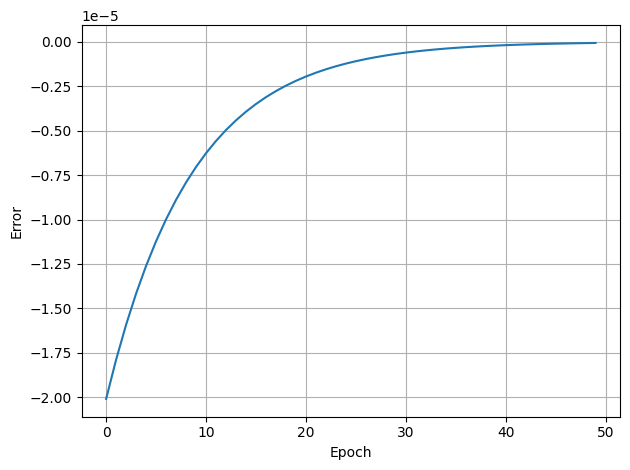

In [32]:
y = 0.1
n_epochs = 50
diff = list () # initalize list of errors
for _ in range (n_epochs):
    # Forward prop (SLP)
    y_hat = slp (x, w, b)
    # Append error to diff
    diff.append (y_hat - y)
    # Set learning rate
    learning_rate = 0.1
    # Change in w, b
    w = (w - learning_rate * ((y_hat - y) * x)).reshape (4)
    b = b - learning_rate * (y_hat - y)
    
plt.plot (diff)
plt.xlabel ("Epoch")
plt.ylabel ("Error")
plt.grid ()
plt.tight_layout ()
plt.show ()

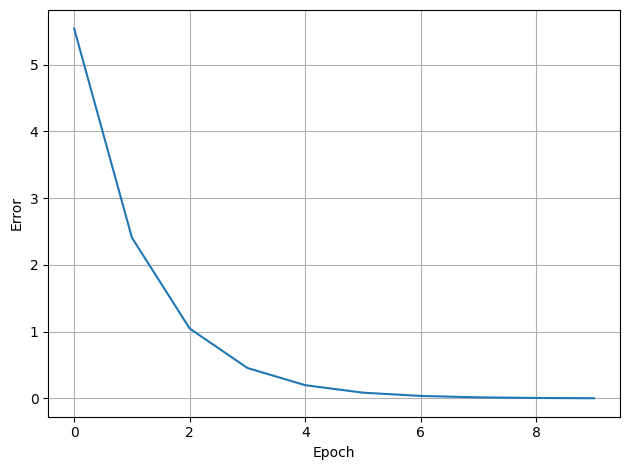

In [34]:
x = np.array([
    [10, 29, 2], [23, 3, 9], 
    [11, 4, 3], [6, 15, 2], 
    [15, 3, 3]
])/10
w = np.random.normal (size=3) # weights
b = 0.1 # bias
diff = list () # initialize list of MSE
for _ in range (10):
    y_hat = slp (x, w, b)
    diff.append ((y_hat - y) @ (y_hat - y) / len (x))
    learning_rate = 0.1
    w = (w - learning_rate * ((y_hat - y) @ x))

plt.plot (diff)
plt.xlabel ("Epoch")
plt.ylabel ("Error")
plt.grid ()
plt.tight_layout ()
plt.show ()

# B. Instruction 2

1. Create an initialization function to set up model

In [35]:
def initialize_model (dimensions):
    """
    Accepts a list of positive integers; 
    Returns a dict 'model' with key/values as follows:
        + model['nlayers'] : number of layers in neural network
        + model['weights'] : list of NumPy matrices with appropriate dimensions
        + model['biases'] : list of NumPy (column) vectors of appropriate dimensions
    These correspond to the weight matrices & bias vectors associated with each layer of a neural network.
    """
    weights, biases = [], []
    L = len (dimensions) - 1 # number of layers (i.e., excludes input layer)
    for l in range (L):
        W = np.random.randn (dimensions[l+1], dimensions[l])
        b = np.random.randn (dimensions[l+1], 1)
        weights.append (W)
        biases.append (b)
    return dict (weights=weights, biases=biases, nlayers=L)

model = initialize_model([3, 5, 2])
print(model['nlayers'])   # 2
print(model['weights'][0].shape)  # (5, 3)
print(model['biases'][0].shape)   # (5, 1)
print(model['weights'][1].shape)  # (2, 5)
print(model['biases'][1].shape)   # (2, 1)

2
(5, 3)
(5, 1)
(2, 5)
(2, 1)


In [36]:
dimensions = [784, 15, 10]
model = initialize_model(dimensions)
for k, (W, b) in enumerate(zip(model['weights'], model['biases'])):
    print(f'Layer {k+1}:\tShape of W{k+1}: {W.shape}\tShape of b{k+1}: {b.shape}')

Layer 1:	Shape of W1: (15, 784)	Shape of b1: (15, 1)
Layer 2:	Shape of W2: (10, 15)	Shape of b2: (10, 1)


In [37]:
print(f'W2:\n\n{model["weights"][1]}')  # Expect a 10x15 matrix of random numbers
print(f'b2:\n\n{model["biases"][1]}')   # Expect a 10x1 vector of random numbers

W2:

[[-1.86354589 -0.20490453  1.87166114  0.40536745  1.01463999  0.26709326
  -1.98000401  1.17295154  1.34627854 -2.05392931 -2.33277148 -1.1498849
  -0.40357743  0.3985115   1.67934566]
 [-0.86418121  0.2588791   1.46461544  0.72217627  0.82766934 -0.8535691
  -1.26801235  0.00957318 -1.69723297  0.4748254  -0.30811057  0.6835347
   2.05403815 -1.24582619 -0.61466239]
 [ 0.41974863 -1.16207879 -0.19784497 -0.48678484  0.69553059 -0.6954085
  -1.28544063  0.48764427  1.07067488  0.5307748  -0.19086067  0.70987639
  -0.12908432  0.25880358 -0.57902087]
 [-0.95420022  0.03667948 -1.22813244 -0.06574575 -0.56405074  0.55672772
   1.5981993   0.56619312  0.35292407  0.16675862  0.64155292 -0.23084424
   3.50424934  1.30150832 -1.45477095]
 [-1.31546165 -1.09789793 -0.46152914 -1.02879802  0.14882231  0.61551919
  -0.04367289  0.13745628 -0.0881466  -0.2193344  -0.44555566 -0.08011386
  -0.60868138 -0.50599677  0.67870199]
 [ 1.31435992  0.21662038  0.4984215  -0.62512735 -0.27317661 -0

In [43]:
def sigma(x): 
    # sigmoid without underflow and overflow
    '''The logistic function; accepts arbitrary arrays as input (vectorized)'''
    return np.where(x>=0, 1/(1+np.exp(-x)), 1 - 1/(1+np.exp(x))) # piecewise for numerical robustness
def sigma_prime(x):
    '''The *derivative* of the logistic function; accepts arbitrary arrays as input (vectorized)'''
    return sigma(x)*(1-sigma(x)) # Derivative of logistic function
def loss(yhat, y):
    '''The loss as measured by the L2-norm squared of the error'''
    return 0.5 * np.square(yhat-y).sum()
def loss_prime(yhat, y):
    '''Implementation of the gradient of the loss function'''
    return (yhat - y) # gradient w.r.t. yhat
def forward(x, model):
    '''Implementation of forward propagation through a feed-forward neural network.
       x : input array oriented column-wise (i.e., features along the rows)
       model : dict with same keys as output of initialize_model & appropriate lists in 'weights' & 'biases'
    The output dict model is the same as the input with additional keys 'z_inputs' & 'activations';
    these are accumulated to be used later for backpropagation. Notice the lists model['z_inputs'] &
    model['activations'] both have the same number of entries as model['weights'] & model['biases']
    (one for each layer).
    '''
    a = x
    activations = [a]
    zs = []
    for W, b in zip(model['weights'], model['biases']):
        z = W @ a + b
        a = sigma(z)
        zs.append(z)
        activations.append(a)
    model['activations'], model['z_inputs'] = activations, zs
    return (a, model)

# Use a test example to illustrate that the network is initialized as needed
dimensions = [784, 15, 10]
model = initialize_model(dimensions)
print(f'Before executing *forward*:\nkeys == {model.keys()}')
N_batch = 3  # Let's use, say, 3 random inputs & their corresponding outputs
x_input = np.random.rand(dimensions[0], N_batch)
y = np.random.rand(dimensions[-1], N_batch)

y_hat, model = forward(x_input, model)  # the dict model is *updated* by forward propagation
print(f'After executing *forward*:\nkeys == {model.keys()}')
# Observe additional dict keys: 'activations' & 'z_inputs'

Before executing *forward*:
keys == dict_keys(['weights', 'biases', 'nlayers'])
After executing *forward*:
keys == dict_keys(['weights', 'biases', 'nlayers', 'activations', 'z_inputs'])


In [44]:
def backward(y, model):
    '''Implementation of backward propagation of data through the network
       y : output array oriented column-wise (i.e., features along the rows) as output by forward
       model : dict with same keys as output by forward
    Note the input needs to have keys 'nlayers', 'weights', 'biases', 'z_inputs', and 'activations'
    '''
    Nbatch = y.shape[1] # Needed to extend for batches of vectors
    # Compute the "error" delta^L for the output layer
    yhat = model['activations'][-1]
    z, a = model['z_inputs'][-1], model['activations'][-2]
    delta = loss_prime(yhat, y) * sigma_prime(z)
    # Use delta^L to compute gradients w.r.t b & W in the output layer.
    grad_b, grad_W = delta @ np.ones((Nbatch, 1)), np.dot(delta, a.T)
    grad_weights, grad_biases = [grad_W], [grad_b]
    loop_iterates = zip(model['weights'][-1:0:-1],
                        model['z_inputs'][-2::-1],
                        model['activations'][-3::-1])
    for W, z, a in loop_iterates:
        delta = np.dot(W.T, delta) * sigma_prime(z)
        grad_b, grad_W = delta @ np.ones((Nbatch, 1)), np.dot(delta, a.T)
        grad_weights.append(grad_W)
        grad_biases.append(grad_b)
    # We built up lists of gradients backwards, so we reverse the lists
    model['grad_weights'], model['grad_biases'] = grad_weights[::-1], grad_biases[::-1]
    return model

# Use the test example from above. Assume model, x_input have been initialized & *forward* has been executed already.
print(f'Before executing *backward*:\nkeys == {model.keys()}')

model = backward(y, model)  # the dict model is updated *again* by backward propagation
print(f'After executing *backward*:\nkeys == {model.keys()}')
# Observe additional dict keys: 'grad_weights' & 'grad_biases'

Before executing *backward*:
keys == dict_keys(['weights', 'biases', 'nlayers', 'activations', 'z_inputs'])
After executing *backward*:
keys == dict_keys(['weights', 'biases', 'nlayers', 'activations', 'z_inputs', 'grad_weights', 'grad_biases'])


In [45]:
def update(eta, model):
    '''Use learning rate and gradients to update model parameters
       eta : learning rate (positive scalar parameter)
       model : dict with same keys as output by backward
    Output result is a modified dict model
    '''
    new_weights, new_biases = [], []
    for W, b, dW, db in zip(model['weights'], model['biases'], model['grad_weights'], model['grad_biases']):
        new_weights.append(W - (eta * dW))
        new_biases.append(b- (eta * db))
    model['weights'] = new_weights
    model['biases'] = new_biases
    # Get rid of extraneous keys/values
    for key in ['z_inputs', 'activations', 'grad_weights', 'grad_biases']:
        del model[key]
    return model

print(f'Before executing *update*:\nkeys == {model.keys()}')

eta = 0.5  # Choice of learning rate
model = update(eta, model)  # the dict model is updated *again* by calling *update*
print(f'After executing *update*:\nkeys == {model.keys()}')
# Observe fewer dict keys: extraneous keys have been freed.

# Observe the required sequence of executions: (forward -> backward -> update -> forward -> backward -> ...)
# If done out of sequence, results in KeyError
backward(y, model)  # This should cause an exception (KeyError)

Before executing *update*:
keys == dict_keys(['weights', 'biases', 'nlayers', 'activations', 'z_inputs', 'grad_weights', 'grad_biases'])
After executing *update*:
keys == dict_keys(['weights', 'biases', 'nlayers'])


KeyError: 'activations'

In [46]:
N_batch = 10
n_epochs = 30
dimensions = [784, 15, 10]
X = np.random.randn(dimensions[0], N_batch)
y = np.random.randn(dimensions[-1], N_batch)
eta = 0.5
model = initialize_model(dimensions)

for epoch in range(n_epochs):
    yhat, model = forward(X, model)
    err = loss(yhat, y)
    print(f'Epoch: {epoch}\tLoss: {err}')
    model = backward(y, model)
    model = update(eta, model)

# Expect to see loss values decreasing systematically in each iteration.

Epoch: 0	Loss: 71.4557934539611
Epoch: 1	Loss: 52.93453955235032
Epoch: 2	Loss: 47.11533163333461
Epoch: 3	Loss: 43.870168165236926
Epoch: 4	Loss: 42.40471225366445
Epoch: 5	Loss: 41.43832988272274
Epoch: 6	Loss: 40.84593726860482
Epoch: 7	Loss: 40.36207310747791
Epoch: 8	Loss: 39.91245469753725
Epoch: 9	Loss: 39.50069942451809
Epoch: 10	Loss: 39.077202806422584
Epoch: 11	Loss: 38.66427701168356
Epoch: 12	Loss: 38.32275683195298
Epoch: 13	Loss: 38.01411501372495
Epoch: 14	Loss: 37.71095302824134
Epoch: 15	Loss: 37.489428058113816
Epoch: 16	Loss: 37.28897999065919
Epoch: 17	Loss: 37.07859068770549
Epoch: 18	Loss: 36.96727308582114
Epoch: 19	Loss: 36.7763692263767
Epoch: 20	Loss: 36.61635530013817
Epoch: 21	Loss: 36.507773764252185
Epoch: 22	Loss: 36.39304597477595
Epoch: 23	Loss: 36.266884281966654
Epoch: 24	Loss: 36.170009180135075
Epoch: 25	Loss: 36.08587093765673
Epoch: 26	Loss: 36.01208314380805
Epoch: 27	Loss: 35.94668880099224
Epoch: 28	Loss: 35.88805533783418
Epoch: 29	Loss: 35.8

In [47]:

N_batch = 50
n_epochs = 30000
SKIP = 50
dimensions = [784, 15, 10]
X = np.random.randn(dimensions[0], N_batch)
y = np.random.randn(dimensions[-1], N_batch)
eta = 0.5
model = initialize_model(dimensions)

# accumulate the epoch and loss in these respective lists
epochs, losses = [], []
for epoch in range(n_epochs):
    yhat, model = forward(X, model)
    model = backward(y, model)
    model = update(eta, model)
    if (divmod(epoch, SKIP)[1]==0):
        err = loss(yhat, y)
        epochs.append(epoch)
        losses.append(err)

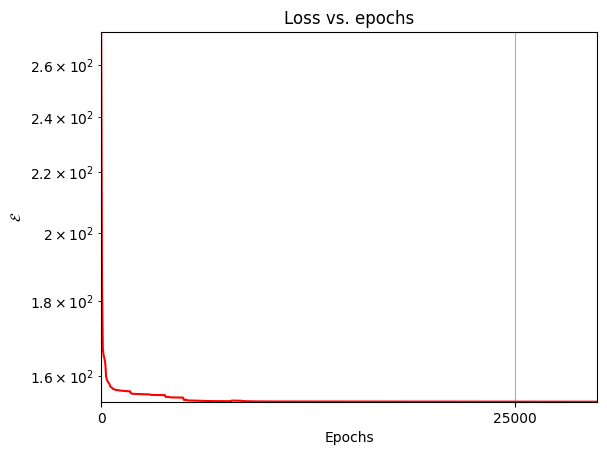

In [48]:
# code for plotting once that the lists epochs and losses are accumulated
fig = plt.figure(); ax = fig.add_subplot(111)
ax.set_xlim([0,n_epochs]); ax.set_ylim([min(losses), max(losses)]);
ax.set_xticks(epochs[::500]); ax.set_xlabel("Epochs"); ax.grid(True);
ax.set_ylabel(r'$\mathcal{E}$'); 
h1 = ax.semilogy(epochs, losses, 'r-', label=r'$\mathcal{E}$')
plt.title('Loss vs. epochs');